# Pymaceuticals Inc.
---

### Analysis

- Ramicane and Capomulin are the only drug regimens that outperform the placebo group.
- Ramicane and Capomulin also have the smallest variance among drug regimens.
- Weight and Tumor Volume are heavily correlated.
- There is a roughly equal distribution of male and female test mice.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
merged_df.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merged_df.loc[merged_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.loc[merged_df["Mouse ID"] != "g989"]
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
len(merged_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimens = merged_df["Drug Regimen"].unique()

means = []
medians = []
vars = []
stds = []
sems = []

for regimen in merged_df["Drug Regimen"].unique():
    tumorData = merged_df.loc[merged_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    means.append(tumorData.mean())
    medians.append(tumorData.median())
    vars.append(tumorData.var())
    stds.append(tumorData.std())
    sems.append(tumorData.sem())

regimen_df = pd.DataFrame({
    "Drug Regimen" : regimens,
    "Mean Tumor Volume" : means,
    "Median Tumor Volume" : medians,
    "Tumor Volume Variance" : vars,
    "Tumor Volume Std. Dev." : stds,
    "Tumor Volume Std. Err." : sems
}).set_index("Drug Regimen")

regimen_df = regimen_df.sort_values(by="Drug Regimen")
regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_functions = { 
    'Tumor Volume (mm3)': 
    ['mean', 'median', 'var', 'std', 'sem'] 
}
merged_df.groupby(['Drug Regimen']).agg(agg_functions) 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

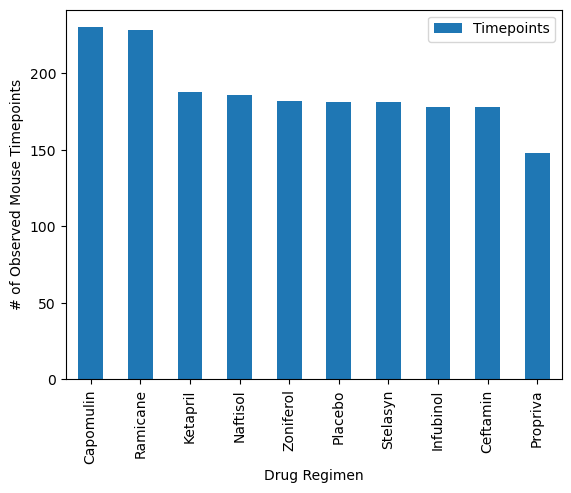

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimens = merged_df["Drug Regimen"].unique()
sums = []

for regimen in regimens:
    sums.append(len(merged_df.loc[merged_df["Drug Regimen"] == regimen]))

# Convert the data to a dataframe
plot_df = pd.DataFrame({
    "Drug Regimen" : regimens,
    "Timepoints" : sums
}).set_index("Drug Regimen").sort_values(by=['Timepoints'], ascending=False)

plot_df.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

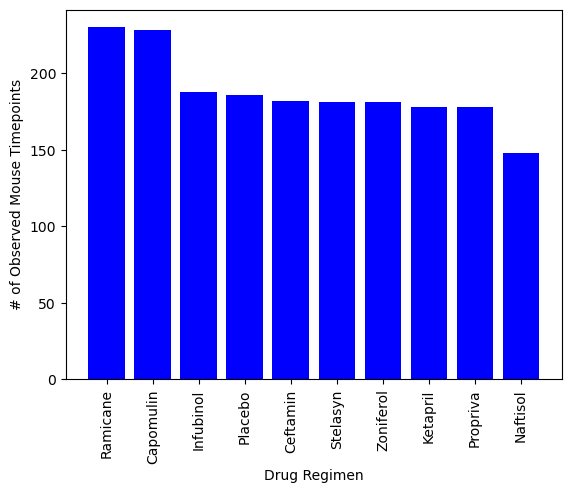

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = merged_df["Drug Regimen"].unique()
sums = []

for regimen in regimens:
    sums.append(len(merged_df.loc[merged_df["Drug Regimen"] == regimen]))

# Convert the data to a dataframe
plot_df = pd.DataFrame({
    "Drug Regimen" : regimens,
    "Timepoints" : sums
}).sort_values(by=['Timepoints'], ascending=False)

x_axis = np.arange(len(regimens))
plt.bar(plot_df["Drug Regimen"], plot_df["Timepoints"], color='b', align="center")
plt.xticks(x_axis, regimens, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

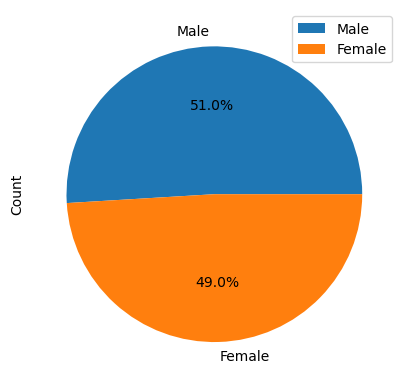

In [25]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sexs = merged_df["Sex"].unique()
sums = []

for sex in sexs:
    sums.append(len(merged_df.loc[merged_df["Sex"] == sex]))

# Make the pie chart
plot_df = pd.DataFrame({
    "Sex" : sexs,
    "Count" : sums
}).set_index("Sex")
plot_df.plot(kind="pie", y="Count", autopct='%1.1f%%')
plt.show()

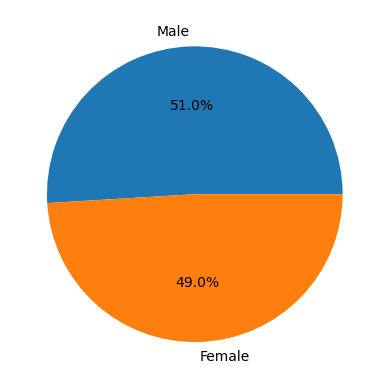

In [26]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sexs = merged_df["Sex"].unique()
sums = []

for sex in sexs:
    sums.append(len(merged_df.loc[merged_df["Sex"] == sex]))

# Make the pie chart
plot_df = pd.DataFrame({
    "Sex" : sexs,
    "Count" : sums
}).set_index("Sex")
plt.pie(sums, labels=sexs, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_end = []

# Start by getting the last (greatest) timepoint for each mouse
for index, row in merged_df.iterrows():
    lastTimepoint = merged_df.loc[merged_df["Mouse ID"] == row["Mouse ID"]]["Timepoint"].max()
    tumor_end.append(merged_df.loc[(merged_df["Mouse ID"] == row["Mouse ID"]) & (merged_df["Timepoint"] == lastTimepoint)]["Tumor Volume (mm3)"])

# tumor_vol
merged_df.loc[:, 'End Size'] = tumor_end
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,End Size
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = [
    "Capomulin",
    "Ramicane",
    "Infubinol",
    "Ceftamin"
]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Locate the rows which contain mice on each drug and get the tumor vol
for regimen in regimens:
    regimen_ids = merged_df.loc[merged_df["Drug Regimen"] == regimen]["Mouse ID"].unique()
    tumor_vol = []
    for id in regimen_ids:
        tumor_vol.append(merged_df.loc[merged_df["Mouse ID"] == id]["End Size"].max())
    # Appende the tumor volumes list to the parent list
    tumor_vols.append(tumor_vol)

# Create a Data Frame of tumor end size by regimen
regimen_df = pd.DataFrame({
    "Capomulin" : tumor_vols[0],
    "Ramicane" : tumor_vols[1],
    "Infubinol" : tumor_vols[2],
    "Ceftamin" : tumor_vols[3]
})

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimens:
    # Determine outliers using upper and lower bounds
    quartiles = regimen_df[regimen].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {regimen} is: {lowerq}")
    print(f"The upper quartile of {regimen} is: {upperq}")
    print(f"The interquartile range of {regimen} is: {iqr}")
    print(f"The the median of {regimen} is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"----------------------------")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
----------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
----------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
----------------------------
The lower quartile of Ceftami

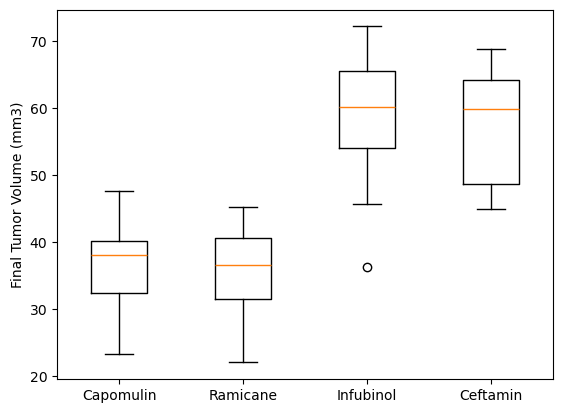

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(regimen_df)
plt.xticks([1,2,3,4], regimens)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

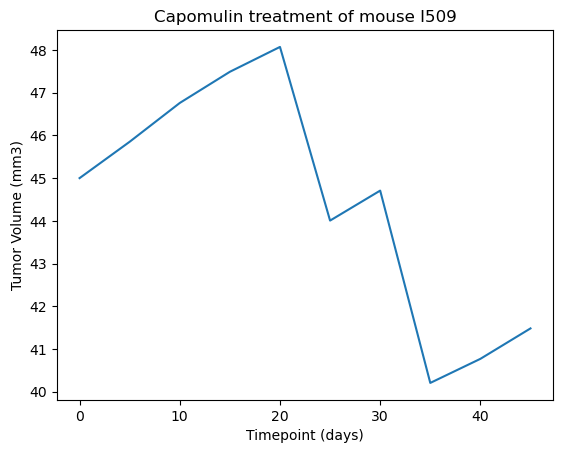

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df = merged_df.loc[merged_df["Mouse ID"] == "l509"]
x_axis = mouse_df["Timepoint"]
mouse_tumor_vols = mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis, mouse_tumor_vols)
plt.title('Capomulin treatment of mouse I509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show

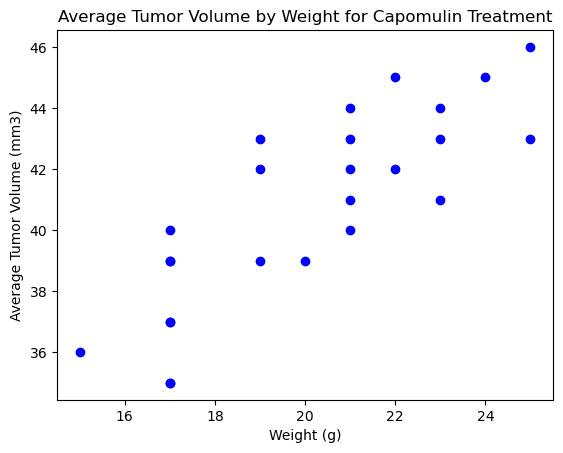

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_ids = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
weights = []
avg_vols = []

for mouse_id in mouse_ids:
    weights.append(int(merged_df.loc[merged_df["Mouse ID"] == mouse_id]["Weight (g)"].max()))
    avg_vols.append(int(round(merged_df.loc[merged_df["Mouse ID"] == mouse_id]["Tumor Volume (mm3)"].mean())))

# convert the data into a dataframe so linear regression will work
capo_df = pd.DataFrame({
    "Weight" : weights,
    "Volume" : avg_vols
})

x_values = capo_df['Weight']
y_values = capo_df['Volume']

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="blue")
plt.title('Average Tumor Volume by Weight for Capomulin Treatment')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

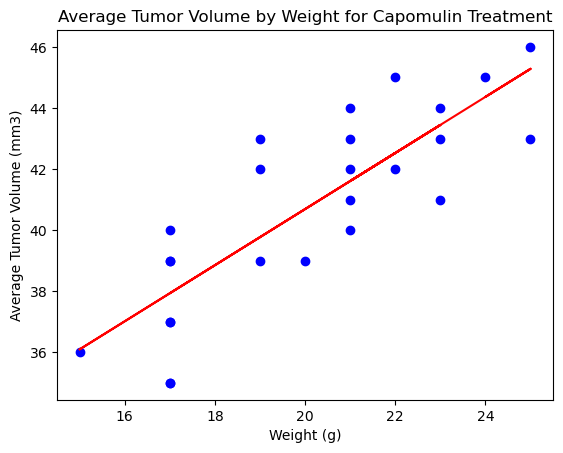

The correlation between both factors is 0.83


In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# calculate the linear regression
x_values = capo_df['Weight']
y_values = capo_df['Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Average Tumor Volume by Weight for Capomulin Treatment')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

#calculate the correlation
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")